In [1]:
from sklearn import mixture, metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time

In [2]:
datasetOriginal = pd.read_csv("data/mnist_train.csv")
df = datasetOriginal.copy()
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# separar os rotulos dos dados
label, x = df.iloc[:, :1], df.iloc[:, 1:]
label = label.to_numpy().transpose()[0]
x = x.to_numpy()
label, x

(array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [4]:
idx = np.random.RandomState(seed=42).permutation(len(x))
x = x[idx, :]
label = label[idx]

amostras = np.arange(1000, 12001, step=1000)
ari_results = []
time_results = []

for cut in amostras:
    x_cut = x[:cut, :]
    label_cut = label[:cut]
    print(f'Amostras: {cut}', end='')
    
    t0 = time()
    gmm = mixture.GaussianMixture(n_components=10, random_state=42)
    gmm_predict = gmm.fit(x_cut).predict(x_cut)
    t1 = time()
    
    ari = metrics.adjusted_rand_score(label_cut, gmm_predict)
    t = t1 - t0
    print(f' | Resultado: {ari:.3f} ({t:.1f}s)')
    
    ari_results.append(ari)
    time_results.append(t)

Amostras: 1000 | Resultado: 0.326 (1.1s)
Amostras: 2000 | Resultado: 0.316 (1.8s)
Amostras: 3000 | Resultado: 0.327 (2.5s)
Amostras: 4000 | Resultado: 0.353 (3.1s)
Amostras: 5000 | Resultado: 0.321 (13.1s)
Amostras: 6000 | Resultado: 0.304 (25.9s)
Amostras: 7000 | Resultado: 0.289 (26.2s)
Amostras: 8000 | Resultado: 0.321 (35.8s)
Amostras: 9000 | Resultado: 0.274 (38.1s)
Amostras: 10000 | Resultado: 0.345 (31.7s)
Amostras: 11000 | Resultado: 0.208 (57.9s)
Amostras: 12000 | Resultado: 0.173 (101.6s)


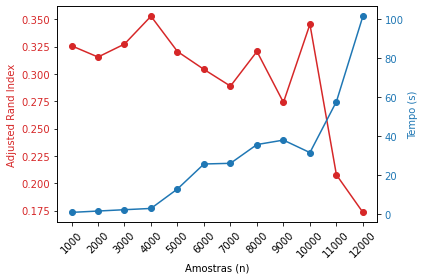

In [19]:
fig, ax1 = plt.subplots()
plt.xticks(amostras, rotation=45, ha='center')

color = 'tab:red'
ax1.set_xlabel('Amostras (n)')
ax1.set_ylabel('Adjusted Rand Index', color=color)
ax1.plot(amostras, ari_results, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Tempo (s)', color=color)
ax2.plot(amostras, time_results, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()